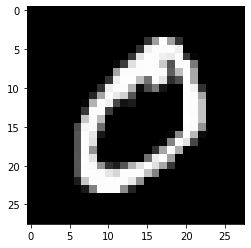

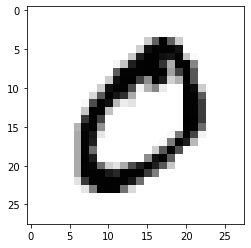

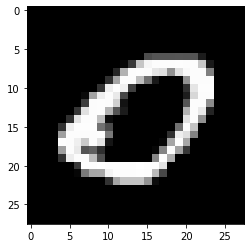

In [4]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_openml

# download and load mnist data from https://www.openml.org/d/554
# for this tutorial, the data have been downloaded already in './scikit_learn_data'
X, Y = fetch_openml('mnist_784', version=1, data_home='./scikit_learn_data', return_X_y=True)

# make the value of pixels from [0, 255] to [0, 1] for further process
X = X / 255.

# print the first image of the dataset
img1 = X[1].reshape(28, 28)
plt.imshow(img1, cmap='gray')
plt.show()

# print the images after simple transformation
img2 = 1 - img1
plt.imshow(img2, cmap='gray')
plt.show()

img3 = img1.transpose()
plt.imshow(img3, cmap='gray')
plt.show()

In [58]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)

clf = LogisticRegression()
clf.fit(X_train, Y_train)

train_accuracy=clf.score(X_train, Y_train)
test_accuracy=clf.score(X_test, Y_test)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 97.22%
Testing accuracy: 87.80%


C:\Users\Carly\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)

clf = BernoulliNB()
clf.fit(X_train, Y_train)

train_accuracy=clf.score(X_train, Y_train)
test_accuracy=clf.score(X_test, Y_test)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 81.82%
Testing accuracy: 81.20%


In [55]:
# TODO:use support vector machine
from sklearn.svm import LinearSVC
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)
clf = LinearSVC()

clf.fit(X_train, Y_train)

train_accuracy=clf.score(X_train, Y_train)
test_accuracy=clf.score(X_test, Y_test)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 97.93%
Testing accuracy: 85.40%


C:\Users\Carly\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [57]:
# TODO:use support vector machine
from sklearn.svm import LinearSVC
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)
clf = LinearSVC(max_iter=100000)

clf.fit(X_train, Y_train)

train_accuracy=clf.score(X_train, Y_train)
test_accuracy=clf.score(X_test, Y_test)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 97.87%
Testing accuracy: 86.30%


In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

BATCH_SIZE = 128
NUM_CLASSES = 10
NUM_EPOCHS = 10

# download and load the data (split them between train and test sets)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# expand the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# make the value of pixels from [0, 255] to [0, 1] for further process
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert class vectors to binary class matrics
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=NUM_EPOCHS,
          verbose=1,
          validation_data=(x_test, y_test))

training_score = model.evaluate(x_train, y_train, verbose=0)
testing_score = model.evaluate(x_test, y_test, verbose=0)

print('Training loss: %.4f, Training accuracy: %.2f%%' % (training_score[0],training_score[1]))
print('Testing loss: %.4f, Testing accuracy: %.2f%%' % (testing_score[0],testing_score[1]))



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 281s 5ms/step - loss: 0.2688 - acc: 0.9170 - val_loss: 0.0574 - val_acc: 0.9816
Epoch 2/10
60000/60000 [==============================] - 317s 5ms/step - loss: 0.0870 - acc: 0.9738 - val_loss: 0.0435 - val_acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 304s 5ms/step - loss: 0.0654 - acc: 0.9808 - val_loss: 0.0409 - val_acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 305s 5ms/step - loss: 0.0539 - acc: 0.9840 - val_loss: 0.0284 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 312s 5ms/step - loss: 0.0475 - acc: 0.9856 - val_loss: 0.0286 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 298s 5ms/step - loss: 0.0428 - acc: 0.9872 - val_loss: 0.0289 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 291s 5ms/step - loss: 0.0370 - acc: 0.9888 - val_loss: 0.0286 - 